In [ ]:
import cv2
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt
import os

In [ ]:
image = cv2.imread("images/1a.jpg")
cv2.imshow("Image", image)

In [ ]:
esc_gray = np.invert(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

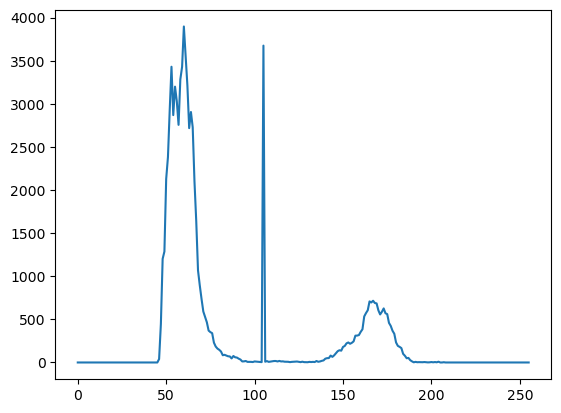

In [ ]:
hist = cv2.calcHist([esc_gray], [0], None, [256], [0, 256])
plt.plot(hist)

Text(0.5, 1.0, 'Gray scale mango image')

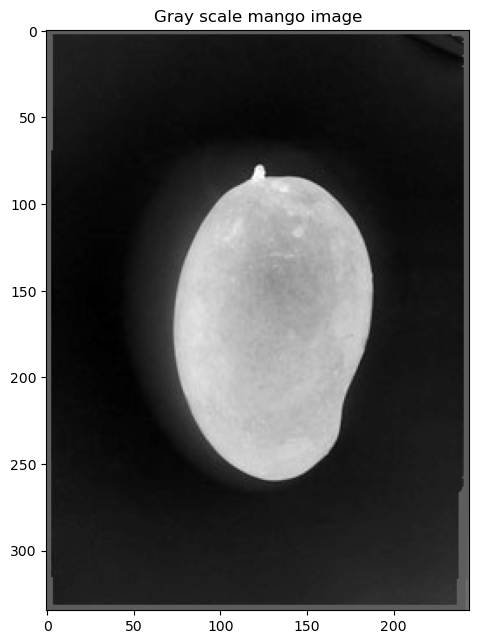

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(esc_gray, cmap = "gray")
plt.title('Gray scale mango image')

In [ ]:
m = cv2.moments(esc_gray)
centroid_x = int(m["m10"] / m["m10"])
centroid_y = int(m["m01"] / m["m10"])

hu = cv2.HuMoments(m)


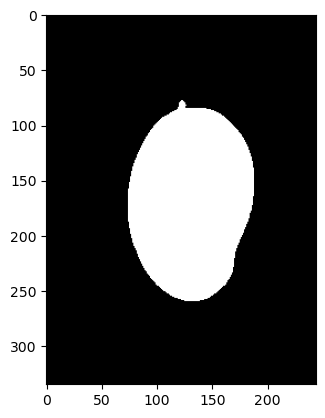

In [ ]:
ret, tresh = cv2.threshold(esc_gray, 130, 256, cv2.THRESH_BINARY)
plt.imshow(tresh, cmap = "gray")

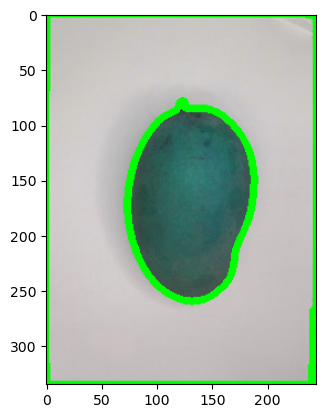

In [ ]:
contours,_= cv2.findContours(tresh,
                            cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_SIMPLE)

cont = contours[0]

img_cont = cv2.drawContours(image, cont, -1, (0, 255, 0), 3)

plt.imshow(img_cont)

In [ ]:
perimeter = cv2.arcLength(cont,True)
print("Perimeter: ", perimeter)

Perimeter:  495.6883809566498


In [ ]:
area = cv2.contourArea(cont)

In [ ]:
folder_path = "MangoMass/images/"

In [ ]:
df = pd.read_csv("C:/Users/Penny/Desktop/2024-2/Visión por computadora/MangoMass/Harumanis_mango_weight.csv")
df.head(10)

,no,weight
0,1a.jpg,0.50
1,2a.jpg,0.50
2,3a.jpg,0.35
3,4a.jpg,0.45
4,5a.jpg,0.50
5,6a.jpg,0.40
6,7a.jpg,0.70
7,8a.jpg,0.45
8,9a.jpg,0.30
9,10a.jpg,0.30


In [ ]:
df["area"] = 0
df["perimeter"] = 0

In [ ]:
df.head(10)

,no,weight,area,perimeter
0,1a.jpg,0.50,0,0
1,2a.jpg,0.50,0,0
2,3a.jpg,0.35,0,0
3,4a.jpg,0.45,0,0
4,5a.jpg,0.50,0,0
5,6a.jpg,0.40,0,0
6,7a.jpg,0.70,0,0
7,8a.jpg,0.45,0,0
8,9a.jpg,0.30,0,0
9,10a.jpg,0.30,0,0


In [ ]:
img_names = df["no"]

for img_names in img_names:
    file = os.path.join(folder_path, img_names)
    img = cv2.imread(file)
    esc_gray_gen = np.invert(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
    _,th = cv2.threshold(esc_gray_gen,130,255,cv2.THRESH_BINARY)

    contours_gen,_ = cv2.findContours(th,
                                cv2.RETR_EXTERNAL,
                                cv2.CHAIN_APPROX_SIMPLE)

    cont_new = contours_gen[0]

    perimeter_gen = cv2.arcLength(cont_new,True)
    area_gen = cv2.contourArea(cont_new)

    df.loc[df['no'] == img_names, 'area'] = area
    df.loc[df['no'] == img_names, 'perimeter'] = perimeter


C:\Users\Penny\AppData\Local\Temp\ipykernel_20996\655360507.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15429.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['no'] == img_names, 'area'] = area
C:\Users\Penny\AppData\Local\Temp\ipykernel_20996\655360507.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '495.6883809566498' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['no'] == img_names, 'perimeter'] = perimeter


In [ ]:
df

,no,weight,area,perimeter
0,1a.jpg,0.50,15429.5,495.688381
1,2a.jpg,0.50,15429.5,495.688381
2,3a.jpg,0.35,15429.5,495.688381
3,4a.jpg,0.45,15429.5,495.688381
4,5a.jpg,0.50,15429.5,495.688381
...,...,...,...,...
541,270b.jpg,0.45,15429.5,495.688381
542,271b.jpg,0.45,15429.5,495.688381
543,272b.jpg,0.50,15429.5,495.688381
544,273b.jpg,0.45,15429.5,495.688381


In [ ]:
x = df.drop(columns = ["weight", "no"])

In [ ]:
y = df["weight"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size = 0.2, random_state = 21)

In [ ]:
#Linear Regression
model = LinearRegression(
    fit_intercept=True,  # Incluir el término independiente (intercepto)
    copy_X=True,         # Copiar X o usar X directamente
    n_jobs=-1            # Usar todos los núcleos disponibles para el entrenamiento
)

# Entrenar el modelo
model.fit(x_train, y_train)

# Hacer predicciones
y_pred = model.predict(x_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

Error cuadrático medio (MSE): 0.006591839759432555


In [ ]:
# Comparar el valor real con el valor predicho
comparison = np.vstack((y_test.values, y_pred)).T
comparison_df = pd.DataFrame(comparison, columns=["Real", "Predicho"])

# Mostrar la diferencia numérica entre los valores reales y predichos
comparison_df["Diferencia"] = comparison_df["Real"] - comparison_df["Predicho"]

# Mostrar el dataframe con la comparación
print(comparison_df)

     Real  Predicho  Diferencia
0    0.50  0.470734    0.029266
1    0.52  0.470734    0.049266
2    0.40  0.470734   -0.070734
3    0.45  0.470734   -0.020734
4    0.60  0.470734    0.129266
..    ...       ...         ...
105  0.40  0.470734   -0.070734
106  0.40  0.470734   -0.070734
107  0.40  0.470734   -0.070734
108  0.55  0.470734    0.079266
109  0.52  0.470734    0.049266

[110 rows x 3 columns]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
x, y, test_size = 0.2, random_state = 21)

#DecisionTreeRegressor
model = DecisionTreeRegressor(
    max_depth=5,               # Profundidad máxima del árbol
    min_samples_split=10,      # Número mínimo de muestras para dividir un nodo
    min_samples_leaf=4,        # Número mínimo de muestras en una hoja
    random_state=42,           # Controla la aleatoriedad
    max_leaf_nodes=10,         # Número máximo de nodos hoja
    splitter='best'            # Estrategia de división (mejor división)
)

# Entrenar el modelo
model.fit(X_train, Y_train)

# Hacer predicciones
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

Error cuadrático medio (MSE): 0.006591839759432559


In [ ]:
# Comparar el valor real con el valor predicho
comparison = np.vstack((Y_test.values, Y_pred)).T
comparison_df = pd.DataFrame(comparison, columns=["Real", "Predicho"])

# Mostrar la diferencia numérica entre los valores reales y predichos
comparison_df["Diferencia"] = comparison_df["Real"] - comparison_df["Predicho"]

# Mostrar el dataframe con la comparación
print(comparison_df)

     Real  Predicho  Diferencia
0    0.50  0.470734    0.029266
1    0.52  0.470734    0.049266
2    0.40  0.470734   -0.070734
3    0.45  0.470734   -0.020734
4    0.60  0.470734    0.129266
..    ...       ...         ...
105  0.40  0.470734   -0.070734
106  0.40  0.470734   -0.070734
107  0.40  0.470734   -0.070734
108  0.55  0.470734    0.079266
109  0.52  0.470734    0.049266

[110 rows x 3 columns]
